In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pathlib import Path

In [2]:
data_folder = Path.cwd().parent.parent.joinpath('#task4-eda','datasets') 
input_filename = 'OUTPUT_WBI_exposer_cyclones_v14.csv'
input_file = Path(data_folder).joinpath(input_filename)
print(input_file)

/home/rosana/Omdena-Cyclone/wfpdisrel/#task4-eda/datasets/OUTPUT_WBI_exposer_cyclones_v14.csv


In [3]:
init_data = pd.read_csv(input_file, sep=';')

In [4]:
init_data.head()

,SID,NAME,ISO,YEAR,COORDS,COORDS_MAX_WINDS,COORDS_MIN_DIST2LAND,BASIN,SUB BASIN,MONTH_START,...,Food production index (2004-2006 = 100),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Adjusted savings: education expenditure (% of GNI),Income_level_Final,POP_MAX_34_ADJ,POP_MAX_50_ADJ,POP_MAX_64_ADJ,TOTAL_AFFECTED
0,1949163N07145,DELLA,JPN,1949,"[(21.5, 125.424), (22.2, 125.8), (22.9089, 126...","[(27.6584, 128.82), (28.9141, 129.572999999999...","[(31.9866, 130.683), (33.5183, 130.97299999999...",WP,WP,6,...,67.79,8607.657082,0.0,67.666098,2.867878,Low,1.198300e+07,5.803981e+06,3.320907e+06,194046
1,1950241N23140,JANE,JPN,1950,"[(23.8845, 139.74), (23.9335, 139.639), (23.98...","[(28.7509, 133.748), (29.1201, 133.762), (29.6...","[(34.9374, 135.476), (36.1016, 136.095), (37.2...",WP,WP,8,...,67.79,8607.657082,0.0,67.666098,2.867878,Low,3.160822e+07,1.559196e+07,1.018936e+07,642117
2,1951224N12316,CHARLIE,JAM,1951,"[(17.3398, -75.4138), (17.6, -76.2), (17.9, -7...","[(17.6, -76.2), (17.9, -76.9)]","[(17.9, -76.9), (18.1, -77.8)]",NAm,CS,8,...,69.93,3796.219401,0.0,64.770000,2.578304,Low,1.689243e+06,1.687083e+06,1.195052e+06,20200
3,1951337N09150,AMY,PHL,1951,"[(12.0725, 130.967), (12.1333, 130.517), (12.1...","[(11.7833, 127.9)]","[(10.7333, 124.8), (10.534, 123.174), (10.6833...",WP,WP,12,...,25.68,1059.467412,0.0,61.105000,2.757732,Low_Middle,4.760039e+06,3.006670e+06,1.114774e+06,60000
4,1952180N05144,EMMA,PHL,1952,"[(9.33776, 130.185), (9.38633, 129.61), (9.45,...","[(9.45, 129.017), (9.50407, 128.407), (9.56613...","[(10.4667, 123.867), (10.6492, 123.239), (10.8...",WP,WP,7,...,25.68,1059.467412,0.0,61.105000,2.757732,Low_Middle,5.130796e+06,2.789486e+06,1.988524e+06,103


In [5]:
init_data['TOTAL_AFFECTED_ex_1'] = pd.qcut(init_data['TOTAL_AFFECTED'], q=2)

In [6]:
test = list(init_data['TOTAL_AFFECTED_ex_1'].unique())

In [68]:
test


[Interval(30000.0, 29622000.0, closed='right'),
 Interval(1.999, 30000.0, closed='right')]

In [86]:
# Identifying the 66 outliers 

init_data['TOTAL_AFFECTED_ex_5'] = pd.qcut(init_data['TOTAL_AFFECTED'], q=15)

intervals = init_data['TOTAL_AFFECTED_ex_5'].unique().categories

outliers= intervals[-1]

outliers_df = init_data[init_data['TOTAL_AFFECTED_ex_5']==outliers]

outliers_df

,SID,NAME,ISO,YEAR,COORDS,COORDS_MAX_WINDS,COORDS_MIN_DIST2LAND,BASIN,SUB BASIN,MONTH_START,...,"Life expectancy at birth, total (years)",Adjusted savings: education expenditure (% of GNI),Income_level_Final,POP_MAX_34_ADJ,POP_MAX_50_ADJ,POP_MAX_64_ADJ,TOTAL_AFFECTED,TOTAL_AFFECTED_ex_1,output_class,TOTAL_AFFECTED_ex_5
53,1972039S13068,EUGENIE,MDG,1972,"[(-18.6729, 52.7201), (-18.72, 52.12), (-18.74...","[(-18.8212, 47.9292)]","[(-18.8169, 48.718999999999994), (-18.8212, 47...",SI,SI,2,...,45.735000,3.000000,Low_Middle,4.271956e+06,2.370037e+06,1.825326e+06,2510056,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
60,1973320N05142,VERA,PHL,1973,"[(9.01126, 130.076), (9.35, 129.8), (9.64361, ...","[(13.5429, 116.757), (13.7691, 116.467), (14.0...","[(11.4881, 125.216), (11.5283, 124.404), (11.3...",WP,WP,11,...,63.197000,2.205623,Low_Middle,6.508800e+06,1.953743e+06,9.304245e+05,3400024,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
79,1976131N12142,OLGA,PHL,1976,"[(11.6857, 130.843), (11.9081, 130.602), (12.1...","[(16.5143, 122.157)]","[(16.5143, 122.157), (16.4765, 121.965), (16.4...",WP,WP,5,...,63.206000,1.800000,Low_Middle,1.521694e+07,3.890797e+06,1.846549e+06,2700000,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
110,1980197N07154,JOE,VNM,1980,"[(20.6511, 108.383), (20.8194, 107.543), (20.9...","[(20.6511, 108.383)]","[(20.9333, 106.787), (20.8699, 106.17), (20.77...",WP,WP,7,...,67.542000,2.300000,Low_Middle,2.133313e+07,1.763439e+07,7.941909e+06,6624710,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
117,1980254N14112,RUTH,VNM,1980,"[(13.5, 112.0), (13.755, 112.23), (14.0, 112.5...","[(19.8725, 106.726), (19.7534, 106.125), (19.5...","[(19.5619, 105.519), (19.3257, 104.917), (19.0...",WP,WP,9,...,67.542000,2.300000,Low_Middle,1.519988e+07,4.054115e+06,1.277103e+06,9027174,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,2017147N14087,MORA,BGD,2017,"[(19.85, 91.65), (20.2513, 91.7212), (21.0, 91...","[(21.0, 91.9)]","[(21.8988, 91.9716), (23.0, 92.0)]",NI,BB,5,...,72.052000,1.244550,Low_Middle,8.475100e+07,1.454293e+07,1.183747e+07,3300012,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
931,2017242N16333,IRMA,CUB,2017,"[(22.0257, -76.5868), (22.1, -77.2), (22.3, -7...","[(22.1, -77.2), (22.3, -77.9)]","[(22.4, -78.3), (22.8999, -79.7724)]",NAm,GM,9,...,78.662000,13.010000,High_Middle,1.105880e+07,8.326408e+06,3.365213e+06,10000000,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
947,2017304N11127,DAMREY,VNM,2017,"[(12.6592, 113.884), (12.675, 113.475), (12.70...","[(12.775, 110.425)]","[(12.55, 109.125), (12.4829, 108.509), (12.446...",WP,WP,11,...,75.241000,4.603050,Low_Middle,1.258587e+07,6.371253e+06,3.460638e+06,4330000,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
973,2018250N12168,MANGKHUT,PHL,2018,"[(14.4296, 131.912), (14.5, 131.35), (14.6069,...","[(15.225, 127.9)]","[(18.0325, 121.419), (18.1, 120.7)]",WP,WP,9,...,70.713991,1.840000,Low_Middle,5.124295e+07,2.239086e+06,1.878531e+07,3800138,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"


In [8]:
init_data['output_class'] = init_data.apply(lambda x: 0 if x['TOTAL_AFFECTED_ex_1'] == test[1] else 1,
                                            axis=1)

In [9]:
# Correlations of numerical values
init_data.corr(method="spearman")['TOTAL_AFFECTED'].sort_values()

HDI                                                  -0.230851
GDP per capita (constant 2010 US$)                   -0.225501
MIN_DIST2LAND                                        -0.182799
Life expectancy at birth, total (years)              -0.151350
Adjusted savings: education expenditure (% of GNI)   -0.145880
MIN_PRES                                             -0.142759
MAX_STORMSPEED                                       -0.071916
Cereal yield (kg per hectare)                        -0.062473
POP_DEN_SQ_KM                                         0.014541
YEAR                                                  0.028391
Food production index (2004-2006 = 100)               0.033942
DISTANCE_TRACK                                        0.040707
Arable land (hectares per person)                     0.047042
34KN_ASSETS                                           0.058882
TOTAL_HOURS_EVENT                                     0.058962
DISTANCE_TRACK_VINCENTY                               0

In [10]:
init_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 53 columns):
SID                                                   991 non-null object
NAME                                                  991 non-null object
ISO                                                   991 non-null object
YEAR                                                  991 non-null int64
COORDS                                                991 non-null object
COORDS_MAX_WINDS                                      991 non-null object
COORDS_MIN_DIST2LAND                                  991 non-null object
BASIN                                                 991 non-null object
SUB BASIN                                             991 non-null object
MONTH_START                                           991 non-null int64
MONTH_END                                             991 non-null int64
DATE_START                                            991 non-null object
DATE_END  

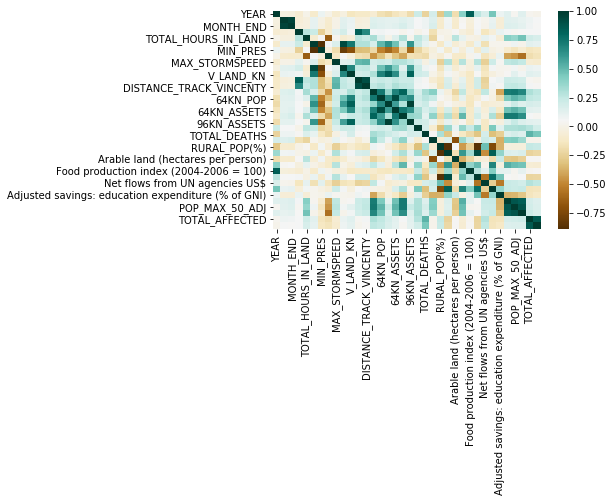

In [11]:
## Numerical Features
## Performing the correlation for all the features
spearman_corr = init_data.corr(method='spearman')
sns.heatmap(spearman_corr, cmap="BrBG")

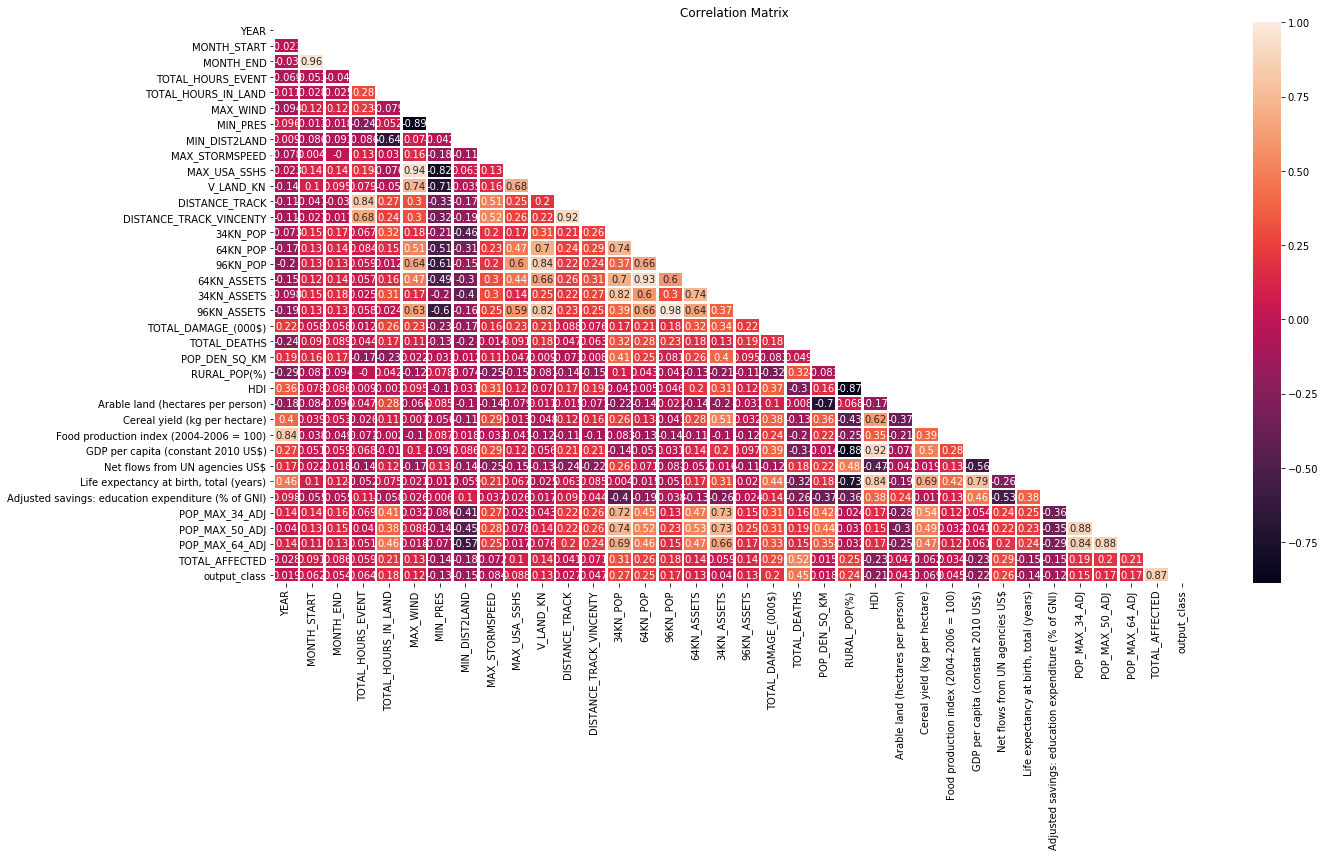

In [12]:
## Copied from Dev's Implementation for a better plot
plt.figure(figsize = (20, 12))
mask = np.triu(np.ones_like(init_data.corr(method = 'spearman'), dtype=bool))
sns.heatmap(round(init_data.corr(method = 'spearman'), 3), mask=mask, annot=True, linewidths=1.5)
plt.title('Correlation Matrix')
plt.tight_layout()
# plt.savefig('plots/cormat.png')
plt.show()

In [13]:
## Checking the skewness of the dataset
init_data.describe()

,YEAR,MONTH_START,MONTH_END,TOTAL_HOURS_EVENT,TOTAL_HOURS_IN_LAND,MAX_WIND,MIN_PRES,MIN_DIST2LAND,MAX_STORMSPEED,MAX_USA_SSHS,...,Food production index (2004-2006 = 100),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Adjusted savings: education expenditure (% of GNI),POP_MAX_34_ADJ,POP_MAX_50_ADJ,POP_MAX_64_ADJ,TOTAL_AFFECTED,output_class
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,989.000000,991.000000,...,987.000000,982.000000,9.910000e+02,987.000000,981.000000,9.110000e+02,9.110000e+02,9.110000e+02,9.910000e+02,991.000000
mean,1999.789102,7.770938,7.833502,89.267238,20.097713,86.881699,939.110999,16.533804,18.303832,1.776993,...,93.329764,9911.140931,2.150700e+07,70.304835,3.248915,2.770093e+07,1.504009e+07,5.948569e+06,5.816176e+05,0.488396
std,14.508337,2.766138,2.781165,73.284572,35.257498,33.635653,137.722579,40.005664,9.563449,1.913196,...,29.318225,15185.727417,2.667692e+07,7.495767,1.864046,4.367805e+07,2.775383e+07,1.159195e+07,2.004164e+06,0.500118
min,1949.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,...,13.360000,141.276363,-2.000000e+04,41.762000,0.538881,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000
25%,1991.000000,7.000000,7.000000,33.000000,0.000000,60.000000,937.000000,0.000000,13.000000,0.000000,...,76.160000,1412.947077,1.030000e+06,66.511671,1.840000,3.072560e+06,1.057294e+06,2.767477e+05,3.038000e+03,0.000000
50%,2004.000000,8.000000,9.000000,75.000000,6.000000,85.000000,960.000000,0.000000,16.000000,1.000000,...,98.770000,2605.425404,1.231000e+07,70.802000,2.800000,1.099835e+07,4.367111e+06,1.566158e+06,3.000000e+04,0.000000
75%,2011.000000,10.000000,10.000000,123.000000,24.000000,115.000000,980.000000,0.000000,21.000000,4.000000,...,113.950000,8918.568543,3.145000e+07,75.087500,4.297143,3.286035e+07,1.691340e+07,5.752552e+06,2.460315e+05,1.000000
max,2019.000000,12.000000,12.000000,516.000000,333.000000,185.000000,1013.000000,199.000000,69.000000,5.000000,...,202.377089,86150.462210,1.837500e+08,84.099756,14.010000,3.764972e+08,3.222762e+08,1.073686e+08,2.962200e+07,1.000000


In [14]:
spearman_corr['TOTAL_AFFECTED'].sort_values(ascending = False)

TOTAL_AFFECTED                                        1.000000
output_class                                          0.865800
TOTAL_DEATHS                                          0.521623
34KN_POP                                              0.313103
Net flows from UN agencies US$                        0.295261
TOTAL_DAMAGE_(000$)                                   0.287962
64KN_POP                                              0.260846
RURAL_POP(%)                                          0.249751
POP_MAX_64_ADJ                                        0.212022
TOTAL_HOURS_IN_LAND                                   0.209744
POP_MAX_50_ADJ                                        0.201107
POP_MAX_34_ADJ                                        0.188636
96KN_POP                                              0.184835
V_LAND_KN                                             0.143085
64KN_ASSETS                                           0.137412
96KN_ASSETS                                           0

In [15]:
# Selecting features 
num_features = ['output_class','TOTAL_HOURS_IN_LAND', 'MAX_WIND', 'MIN_PRES', 'MIN_DIST2LAND', 'V_LAND_KN','RURAL_POP(%)', 'HDI', 'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$','Adjusted savings: education expenditure (% of GNI)', 'TOTAL_AFFECTED']
cat_features = ['GENERAL_CATEGORY', 'MONTH_END','BASIN', 'SUB BASIN', 'NATURE', 'Income_level_Final']
data1 = init_data[num_features + cat_features]

In [16]:
Columns = data1.columns.to_list()

In [17]:
### impute the values
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
### find missing columns based on the features selected
for cols in Columns:
    data1[cols] = impute.fit_transform(data1[[cols]])    

/home/rosana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/rosana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/rosana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [18]:
data1['MONTH_END'] = data1['MONTH_END'].apply(lambda x:str(x))

/home/rosana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
data1 = pd.concat([pd.get_dummies(data1[cat_features]), data1],axis=1)
data1 = data1.dropna()

In [20]:
### select requried columns and divide x and y
X = data1.drop(['TOTAL_AFFECTED','output_class'],axis=1)
y = data1['output_class']

In [21]:
### preform stratifiedshuffle split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(data1, data1['GENERAL_CATEGORY']):
    train_x, test_x = X.iloc[train_index], X.iloc[test_index]
    train_y, test_y = y.iloc[train_index], y.iloc[test_index]

In [22]:
## drop the non numerical columns
train_x.drop(columns = cat_features, axis=1, inplace=True)
test_x.drop(columns= cat_features, axis=1, inplace=True)

/home/rosana/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
numerical_columns =['TOTAL_HOURS_IN_LAND',
       'MAX_WIND', 'MIN_PRES', 'MIN_DIST2LAND', 'V_LAND_KN', 'RURAL_POP(%)',
       'HDI', 'GDP per capita (constant 2010 US$)',
       'Net flows from UN agencies US$',
       'Adjusted savings: education expenditure (% of GNI)']

In [24]:
## perform standard scaler
#select the numerical columsn
ss_scaler = StandardScaler()
for col in numerical_columns:
    train_x[col] = ss_scaler.fit_transform(train_x[[col]])
    test_x[col] = ss_scaler.transform(test_x[[col]])

/home/rosana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/rosana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/rosana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [25]:
## using grid search
from sklearn.model_selection import GridSearchCV
## parameters for SVM
svm_param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
         'C' : [1,5,10],
         'degree' : [3,8],
         'coef0' : [0.01,10,0.5],
         'gamma' : ('auto','scale')},

In [26]:
svm = SVC()
grid_search_svm = GridSearchCV(svm, svm_param, n_jobs=-1, verbose=2)

In [27]:
grid_search_svm.fit(train_x, train_y)
grid_search_svm.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 713 out of 720 | elapsed:   34.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   34.3s finished


SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.01,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
y_pred = grid_search_svm.predict(test_x)

In [29]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0])

In [30]:
roc_auc_score(y_pred, test_y)

0.6632302405498283

In [31]:
X_manual = data1.drop('TOTAL_AFFECTED',axis=1)
y_manual = data1['TOTAL_AFFECTED']

In [32]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(data1, data1['GENERAL_CATEGORY']):
    train_x_man, test_x_man = X_manual.iloc[train_index], X_manual.iloc[test_index]
    train_y_man, test_y_man = y_manual.iloc[train_index], y_manual.iloc[test_index]

In [33]:
train_x_man.drop(columns = cat_features, axis=1, inplace=True)
test_x_man.drop(columns= cat_features, axis=1, inplace=True)

/home/rosana/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
#scaling the manual selected data
ss1_scaler = StandardScaler()
train_x_man['MIN_PRES'] = train_x_man['MIN_PRES'].astype('float64')
test_x_man['MIN_PRES'] = test_x_man['MIN_PRES'].astype('float64')

train_x_man['MIN_DIST2LAND'] = train_x_man['MIN_DIST2LAND'].astype('float64')
test_x_man['MIN_DIST2LAND'] = test_x_man['MIN_DIST2LAND'].astype('float64')

cols_man = train_x_man.select_dtypes(include=['float64']).columns.to_list()
for col in cols_man:
    train_x_man[col] = ss1_scaler.fit_transform(train_x_man[[col]])
    test_x_man[col] = ss1_scaler.transform(test_x_man[[col]])

/home/rosana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rosana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/rosana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [35]:
train_x_man.output_class

104    1
802    1
942    0
414    0
659    1
      ..
172    0
587    0
376    0
846    1
500    0
Name: output_class, Length: 792, dtype: int64

In [36]:
from sklearn.model_selection import GridSearchCV
## parameters for SVM
svm_param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
         'C' : [1,5,10],
         'degree' : [3,8],
         'coef0' : [0.01,10,0.5],
         'gamma' : ('auto','scale')},
## parameters for RF
rf_param = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [37]:
from sklearn.svm import SVR
svr = SVR()
rf = RandomForestRegressor()
grid_search_svr = GridSearchCV(svr, svm_param, n_jobs=-1)
grid_search_rf = GridSearchCV(estimator = rf, param_grid = rf_param, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [38]:
## training initially on manual selection
grid_search_svr.fit(train_x_man, train_y_man)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=({'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                          'degree': [3, 8], 'gamma': ('auto', 'scale'),
                          'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},),
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
grid_search_svr.best_estimator_

SVR(C=1, cache_size=200, coef0=10, degree=8, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [40]:
y_pred_man_svr = grid_search_svr.predict(test_x_man)

In [41]:
print(f'mean absolute error : {mean_absolute_error(y_pred_man_svr, test_y_man)}')
print(f'mean squared error : {mean_squared_error(y_pred_man_svr, test_y_man)}')
print(f'root mean squared error : {np.sqrt(mean_squared_error(y_pred_man_svr, test_y_man))}')

mean absolute error : 635858.1213713901
mean squared error : 4630918020001.059
root mean squared error : 2151956.7885998683


# Less effected

In [42]:
data2 = data1[data1['output_class']==0]
data2

,GENERAL_CATEGORY_Cat 1,GENERAL_CATEGORY_Cat 2,GENERAL_CATEGORY_Cat 3,GENERAL_CATEGORY_Cat 4,GENERAL_CATEGORY_Cat 5,GENERAL_CATEGORY_TD,GENERAL_CATEGORY_TS,MONTH_END_1,MONTH_END_10,MONTH_END_11,...,GDP per capita (constant 2010 US$),Net flows from UN agencies US$,Adjusted savings: education expenditure (% of GNI),TOTAL_AFFECTED,GENERAL_CATEGORY,MONTH_END,BASIN,SUB BASIN,NATURE,Income_level_Final
2,0,0,1,0,0,0,0,0,0,0,...,3796.219401,0.000000e+00,2.578304,20200,Cat 3,8,NAm,CS,TS,Low
4,0,0,1,0,0,0,0,0,0,0,...,1059.467412,0.000000e+00,2.757732,103,Cat 3,7,WP,WP,TS,Low_Middle
6,0,0,1,0,0,0,0,0,0,0,...,3907.493801,0.000000e+00,3.003239,11432,Cat 3,9,NAm,GM,TS,Low
7,0,1,0,0,0,0,0,0,0,0,...,192.285058,0.000000e+00,1.610277,111,Cat 2,9,WP,WP,TS,Low
9,0,1,0,0,0,0,0,0,0,0,...,192.285058,0.000000e+00,1.610277,15127,Cat 2,6,WP,WP,TS,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,0,1,0,0,0,0,0,0,1,0,...,667.945437,1.813728e+07,3.600000,15124,Cat 2,10,NI,AS,NR,Low
980,0,0,0,0,1,0,0,0,1,0,...,10403.540400,1.027804e+07,5.194005,10000,Cat 5,10,EP,EP,TS,High_Middle
983,0,0,0,0,0,1,0,0,0,1,...,1964.475991,2.431523e+07,4.603050,10028,TD,11,WP,WP,NR,Low_Middle
984,0,0,0,0,0,0,1,0,0,0,...,2100.800780,1.019945e+08,3.080000,10000,TS,12,NI,BB,NR,Low_Middle


In [43]:
data2.output_class

2      0
4      0
6      0
7      0
9      0
      ..
978    0
980    0
983    0
984    0
987    0
Name: output_class, Length: 507, dtype: int64

In [44]:
X_manual_0 = data2.drop('TOTAL_AFFECTED',axis=1)
y_manual_0 = data2['TOTAL_AFFECTED']

In [45]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(data2, data2['GENERAL_CATEGORY']):
    train_x_man_0, test_x_man_0 = X_manual_0.iloc[train_index], X_manual_0.iloc[test_index]
    train_y_man_0, test_y_man_0 = y_manual_0.iloc[train_index], y_manual_0.iloc[test_index]

In [46]:
train_x_man_0.drop(columns = cat_features, axis=1, inplace=True)
test_x_man_0.drop(columns= cat_features, axis=1, inplace=True)

/home/rosana/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
#scaling the manual selected data
ss1_scaler = StandardScaler()
train_x_man_0['MIN_PRES'] = train_x_man_0['MIN_PRES'].astype('float64')
test_x_man_0['MIN_PRES'] = test_x_man_0['MIN_PRES'].astype('float64')

train_x_man_0['MIN_DIST2LAND'] = train_x_man_0['MIN_DIST2LAND'].astype('float64')
test_x_man_0['MIN_DIST2LAND'] = test_x_man_0['MIN_DIST2LAND'].astype('float64')

cols_man_0 = train_x_man_0.select_dtypes(include=['float64']).columns.to_list()
for col in cols_man_0:
    train_x_man_0[col] = ss1_scaler.fit_transform(train_x_man_0[[col]])
    test_x_man_0[col] = ss1_scaler.transform(test_x_man_0[[col]])

/home/rosana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rosana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/rosana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [48]:
from sklearn.model_selection import GridSearchCV
## parameters for SVM
svm_param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
         'C' : [1,5,10],
         'degree' : [3,8],
         'coef0' : [0.01,10,0.5],
         'gamma' : ('auto','scale')},
## parameters for RF
rf_param = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [49]:
from sklearn.svm import SVR
svr = SVR()
rf = RandomForestRegressor()
grid_search_svr = GridSearchCV(svr, svm_param, n_jobs=-1)
grid_search_rf = GridSearchCV(estimator = rf, param_grid = rf_param, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [50]:
## training initially on manual selection
grid_search_svr.fit(train_x_man_0, train_y_man_0)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=({'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                          'degree': [3, 8], 'gamma': ('auto', 'scale'),
                          'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},),
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
y_pred_man_svr_0 = grid_search_svr.predict(test_x_man_0)

In [52]:
print(f'mean absolute error : {mean_absolute_error(y_pred_man_svr_0, test_y_man_0)}')
print(f'mean squared error : {mean_squared_error(y_pred_man_svr_0, test_y_man_0)}')
print(f'root mean squared error : {np.sqrt(mean_squared_error(y_pred_man_svr_0, test_y_man_0))}')

mean absolute error : 5944.672586451662
mean squared error : 78917797.89820175
root mean squared error : 8883.568984265376


# Highly Effected 

In [53]:
data3 = data1[data1['output_class']==1]
data3

,GENERAL_CATEGORY_Cat 1,GENERAL_CATEGORY_Cat 2,GENERAL_CATEGORY_Cat 3,GENERAL_CATEGORY_Cat 4,GENERAL_CATEGORY_Cat 5,GENERAL_CATEGORY_TD,GENERAL_CATEGORY_TS,MONTH_END_1,MONTH_END_10,MONTH_END_11,...,GDP per capita (constant 2010 US$),Net flows from UN agencies US$,Adjusted savings: education expenditure (% of GNI),TOTAL_AFFECTED,GENERAL_CATEGORY,MONTH_END,BASIN,SUB BASIN,NATURE,Income_level_Final
0,0,0,0,1,0,0,0,0,0,0,...,8607.657082,0.0,2.867878,194046,Cat 4,6,WP,WP,TS,Low
1,0,0,0,1,0,0,0,0,0,0,...,8607.657082,0.0,2.867878,642117,Cat 4,9,WP,WP,ET,Low
3,0,0,0,1,0,0,0,0,0,0,...,1059.467412,0.0,2.757732,60000,Cat 4,12,WP,WP,TS,Low_Middle
5,0,0,1,0,0,0,0,0,1,0,...,993.246656,0.0,1.284442,250000,Cat 3,10,NAm,CS,TS,Low_Middle
8,0,0,0,0,1,0,0,0,0,0,...,8607.657082,0.0,2.867878,1500000,Cat 5,9,WP,WP,TS,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0,0,0,0,0,0,1,1,0,0,...,6020.836485,0.0,4.188538,720885,TS,1,NI,BB,NR,High_Middle
986,0,0,1,0,0,0,0,0,0,0,...,585.650609,0.0,5.380000,1501500,Cat 3,3,SI,SI,NR,Low
988,0,0,0,1,0,0,0,0,0,0,...,1375.714129,0.0,4.326607,345311,Cat 4,4,SI,SI,NR,Low_Middle
989,0,0,0,1,0,0,0,0,0,0,...,585.650609,0.0,5.380000,400094,Cat 4,4,SI,SI,NR,Low


In [54]:
data3.output_class

0      1
1      1
3      1
5      1
8      1
      ..
985    1
986    1
988    1
989    1
990    1
Name: output_class, Length: 484, dtype: int64

In [55]:
X_manual_1 = data3.drop('TOTAL_AFFECTED',axis=1)
y_manual_1 = data3['TOTAL_AFFECTED']

In [56]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(data3, data3['GENERAL_CATEGORY']):
    train_x_man_1, test_x_man_1 = X_manual_1.iloc[train_index], X_manual_1.iloc[test_index]
    train_y_man_1, test_y_man_1 = y_manual_1.iloc[train_index], y_manual_1.iloc[test_index]

In [57]:
train_x_man_1.drop(columns = cat_features, axis=1, inplace=True)
test_x_man_1.drop(columns= cat_features, axis=1, inplace=True)

/home/rosana/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
#scaling the manual selected data
ss1_scaler = StandardScaler()
train_x_man_1['MIN_PRES'] = train_x_man_1['MIN_PRES'].astype('float64')
test_x_man_1['MIN_PRES'] = test_x_man_1['MIN_PRES'].astype('float64')

train_x_man_1['MIN_DIST2LAND'] = train_x_man_1['MIN_DIST2LAND'].astype('float64')
test_x_man_1['MIN_DIST2LAND'] = test_x_man_1['MIN_DIST2LAND'].astype('float64')

cols_man_1 = train_x_man_1.select_dtypes(include=['float64']).columns.to_list()
for col in cols_man_1:
    train_x_man_1[col] = ss1_scaler.fit_transform(train_x_man_1[[col]])
    test_x_man_1[col] = ss1_scaler.transform(test_x_man_1[[col]])

/home/rosana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rosana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/rosana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [59]:
from sklearn.model_selection import GridSearchCV
## parameters for SVM
svm_param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
         'C' : [1,5,10],
         'degree' : [3,8],
         'coef0' : [0.01,10,0.5],
         'gamma' : ('auto','scale')},
## parameters for RF
rf_param = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [60]:
from sklearn.svm import SVR
svr = SVR()
rf = RandomForestRegressor()
grid_search_svr = GridSearchCV(svr, svm_param, n_jobs=-1)
grid_search_rf = GridSearchCV(estimator = rf, param_grid = rf_param, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [61]:
## training initially on manual selection
grid_search_svr.fit(train_x_man_1, train_y_man_1)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=({'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                          'degree': [3, 8], 'gamma': ('auto', 'scale'),
                          'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},),
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
y_pred_man_svr_1 = grid_search_svr.predict(test_x_man_1)

In [63]:
print(f'mean absolute error : {mean_absolute_error(y_pred_man_svr_1, test_y_man_1)}')
print(f'mean squared error : {mean_squared_error(y_pred_man_svr_1, test_y_man_1)}')
print(f'root mean squared error : {np.sqrt(mean_squared_error(y_pred_man_svr_1, test_y_man_1))}')

mean absolute error : 1039680.856388296
mean squared error : 5708411288405.8
root mean squared error : 2389228.1783885355


In [64]:
data1['TOTAL_AFFECTED_ex_5'] = pd.qcut(init_data['TOTAL_AFFECTED'], q=15)


In [65]:
data1['TOTAL_AFFECTED_ex_5'].value_counts()

(1.999, 200.0]             72
(37770.0, 60000.0]         69
(7030.0, 12000.0]          69
(107650.0, 200000.0]       67
(2100439.0, 29622000.0]    66
(800200.0, 2100439.0]      66
(390150.0, 800200.0]       66
(21656.0, 37770.0]         66
(3710.0, 7030.0]           66
(1700.0, 3710.0]           66
(750.0, 1700.0]            66
(200000.0, 390150.0]       65
(60000.0, 107650.0]        63
(12000.0, 21656.0]         63
(200.0, 750.0]             61
Name: TOTAL_AFFECTED_ex_5, dtype: int64

In [85]:
# Identifying the 66 outliers (clean data frame)


intervals = data1['TOTAL_AFFECTED_ex_5'].unique().categories

outliers= intervals[-1]

outliers_df = data1[data1['TOTAL_AFFECTED_ex_5']==outliers]

outliers_df

,GENERAL_CATEGORY_Cat 1,GENERAL_CATEGORY_Cat 2,GENERAL_CATEGORY_Cat 3,GENERAL_CATEGORY_Cat 4,GENERAL_CATEGORY_Cat 5,GENERAL_CATEGORY_TD,GENERAL_CATEGORY_TS,MONTH_END_1,MONTH_END_10,MONTH_END_11,...,Net flows from UN agencies US$,Adjusted savings: education expenditure (% of GNI),TOTAL_AFFECTED,GENERAL_CATEGORY,MONTH_END,BASIN,SUB BASIN,NATURE,Income_level_Final,TOTAL_AFFECTED_ex_5
53,1,0,0,0,0,0,0,0,0,0,...,2.740000e+06,3.000000,2510056,Cat 1,2,SI,SI,TS,Low_Middle,"(2100439.0, 29622000.0]"
60,0,0,0,0,0,0,1,0,0,1,...,6.820000e+06,2.205623,3400024,TS,11,WP,WP,TS,Low_Middle,"(2100439.0, 29622000.0]"
79,0,0,1,0,0,0,0,0,0,0,...,7.930000e+06,1.800000,2700000,Cat 3,5,WP,WP,TS,Low_Middle,"(2100439.0, 29622000.0]"
110,1,0,0,0,0,0,0,0,0,0,...,5.221000e+07,2.300000,6624710,Cat 1,7,WP,WP,TS,Low_Middle,"(2100439.0, 29622000.0]"
117,1,0,0,0,0,0,0,0,0,0,...,5.221000e+07,2.300000,9027174,Cat 1,9,WP,WP,TS,Low_Middle,"(2100439.0, 29622000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,1,0,0,0,0,0,0,0,0,0,...,6.683530e+07,1.244550,3300012,Cat 1,5,NI,BB,TS,Low_Middle,"(2100439.0, 29622000.0]"
931,0,0,0,0,1,0,0,0,0,0,...,4.741162e+06,13.010000,10000000,Cat 5,9,NAm,GM,TS,High_Middle,"(2100439.0, 29622000.0]"
947,0,1,0,0,0,0,0,0,0,1,...,3.004208e+07,4.603050,4330000,Cat 2,11,WP,WP,TS,Low_Middle,"(2100439.0, 29622000.0]"
973,0,0,0,0,1,0,0,0,0,0,...,2.025966e+07,1.840000,3800138,Cat 5,9,WP,WP,NR,Low_Middle,"(2100439.0, 29622000.0]"


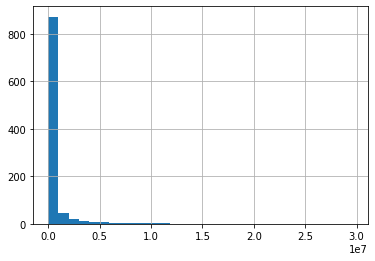

In [95]:
data1['TOTAL_AFFECTED'].hist(bins=30)

#help(data1['TOTAL_AFFECTED'].hist)

In [112]:
data1['TOTAL_AFFECTED_ex_6'] = pd.qcut(init_data['TOTAL_AFFECTED'], q=35)


data1['TOTAL_AFFECTED_ex_6'].unique().categories

IntervalIndex([(1.999, 54.286], (54.286, 123.429], (123.429, 300.0], (300.0, 525.429], (525.429, 868.571] ... (674531.429, 1011714.286], (1011714.286, 1512714.286], (1512714.286, 2501072.286], (2501072.286, 5000000.0], (5000000.0, 29622000.0]],
              closed='right',
              dtype='interval[float64]')

In [113]:
data1['TOTAL_AFFECTED_ex_6'].value_counts()

(40000.0, 50000.0]            37
(7500.0, 10000.0]             34
(390150.0, 500000.0]          33
(5955.429, 7500.0]            31
(123.429, 300.0]              30
(1.999, 54.286]               29
(135983.714, 180005.857]      29
(2501072.286, 5000000.0]      29
(30313.0, 40000.0]            29
(4505.714, 5955.429]          29
(20015.143, 25000.0]          29
(868.571, 1171.0]             29
(1011714.286, 1512714.286]    29
(2297.143, 3204.286]          28
(3204.286, 4505.714]          28
(1171.0, 1700.0]              28
(525.429, 868.571]            28
(54.286, 123.429]             28
(1700.0, 2297.143]            28
(5000000.0, 29622000.0]       28
(15010.286, 20015.143]        28
(75151.857, 100130.571]       28
(100130.571, 135983.714]      28
(180005.857, 226285.714]      28
(226285.714, 288636.714]      28
(288636.714, 390150.0]        28
(674531.429, 1011714.286]     28
(1512714.286, 2501072.286]    28
(25000.0, 30313.0]            28
(300.0, 525.429]              27
(12000.0, 

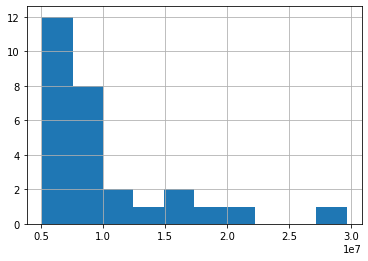

In [124]:
# Identifying 28 outliers (affected > 5 million) 

intervals = data1['TOTAL_AFFECTED_ex_6'].unique().categories

outliers= intervals[-1]

outliers_5m_df = init_data[data1['TOTAL_AFFECTED_ex_6']==outliers]

non_outliers_5m_df = init_data[data1['TOTAL_AFFECTED_ex_6']!=outliers]

outliers_5m_df['TOTAL_AFFECTED'].hist()

In [133]:
outliers_5m_df.describe()



,YEAR,MONTH_START,MONTH_END,TOTAL_HOURS_EVENT,TOTAL_HOURS_IN_LAND,MAX_WIND,MIN_PRES,MIN_DIST2LAND,MAX_STORMSPEED,MAX_USA_SSHS,...,Food production index (2004-2006 = 100),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Adjusted savings: education expenditure (% of GNI),POP_MAX_34_ADJ,POP_MAX_50_ADJ,POP_MAX_64_ADJ,TOTAL_AFFECTED,output_class
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,2.800000e+01,28.000000,28.000000,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,28.0
mean,2004.035714,8.428571,8.464286,77.785714,38.500000,101.607143,943.214286,0.535714,17.285714,2.428571,...,98.844270,2656.966357,5.230165e+07,71.653791,2.588813,8.621070e+07,5.894513e+07,1.926473e+07,1.010267e+07,1.0
std,10.086596,1.793581,1.710147,39.462460,31.845111,33.146520,26.748980,2.834734,5.772586,1.951800,...,30.514400,1697.337179,2.702035e+07,3.233501,2.329955,6.988762e+07,7.379320e+07,2.044243e+07,5.583351e+06,0.0
min,1980.000000,4.000000,5.000000,12.000000,0.000000,58.000000,888.000000,0.000000,9.000000,-1.000000,...,31.310000,377.508281,0.000000e+00,66.244000,1.600000,7.002723e+06,9.335884e+05,3.605117e+04,5.100000e+06,1.0
25%,2000.000000,7.750000,7.750000,51.000000,9.000000,75.000000,922.500000,0.000000,12.750000,1.000000,...,86.045000,1413.547015,4.059703e+07,69.028285,1.790000,2.432950e+07,1.393988e+07,5.535180e+06,6.224890e+06,1.0
50%,2006.000000,8.000000,8.000000,73.500000,37.500000,93.500000,947.500000,0.000000,17.000000,2.000000,...,103.120000,2428.631067,4.997792e+07,72.535000,1.790000,7.951257e+07,3.213695e+07,1.131895e+07,8.489270e+06,1.0
75%,2012.000000,9.000000,9.000000,93.000000,50.250000,134.250000,967.250000,0.000000,20.250000,4.000000,...,119.825000,3166.939360,6.635750e+07,73.341500,2.263137,1.109874e+08,6.444186e+07,2.411249e+07,1.100045e+07,1.0
max,2019.000000,12.000000,12.000000,150.000000,129.000000,170.000000,980.000000,15.000000,34.000000,5.000000,...,143.457277,6666.331728,1.006100e+08,78.662000,13.010000,2.987566e+08,3.222762e+08,8.332016e+07,2.962200e+07,1.0


In [128]:
non_outliers_5m_df.describe()


,YEAR,MONTH_START,MONTH_END,TOTAL_HOURS_EVENT,TOTAL_HOURS_IN_LAND,MAX_WIND,MIN_PRES,MIN_DIST2LAND,MAX_STORMSPEED,MAX_USA_SSHS,...,Food production index (2004-2006 = 100),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Adjusted savings: education expenditure (% of GNI),POP_MAX_34_ADJ,POP_MAX_50_ADJ,POP_MAX_64_ADJ,TOTAL_AFFECTED,output_class
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,961.000000,963.000000,...,959.000000,954.000000,9.630000e+02,959.000000,953.000000,8.830000e+02,8.830000e+02,8.830000e+02,9.630000e+02,963.000000
mean,1999.665628,7.751817,7.815161,89.601073,19.562651,86.453545,938.991693,16.998962,18.333496,1.758048,...,93.168756,10124.051716,2.061162e+07,70.265450,3.268309,2.584558e+07,1.364786e+07,5.526312e+06,3.047852e+05,0.473520
std,14.602150,2.787648,2.804640,74.022227,35.223101,33.570154,139.638790,40.486349,9.651881,1.909769,...,29.283506,15352.805140,2.614338e+07,7.581511,1.846539,4.131213e+07,2.376752e+07,1.095623e+07,7.371915e+05,0.499558
min,1949.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,...,13.360000,141.276363,-2.000000e+04,41.762000,0.538881,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000
25%,1991.000000,7.000000,7.000000,33.000000,0.000000,60.000000,937.000000,0.000000,13.000000,0.000000,...,76.160000,1412.947077,9.500000e+05,66.304000,1.840000,2.948738e+06,1.017323e+06,2.566293e+05,3.000000e+03,0.000000
50%,2004.000000,8.000000,9.000000,75.000000,6.000000,85.000000,960.000000,0.000000,16.000000,1.000000,...,98.430000,2605.493599,1.165000e+07,70.802000,2.867878,1.047491e+07,4.129534e+06,1.437322e+06,2.500000e+04,0.000000
75%,2011.000000,10.000000,10.000000,124.500000,24.000000,115.000000,981.000000,0.000000,21.000000,4.000000,...,113.870000,8967.029190,2.987000e+07,75.123000,4.330000,3.091623e+07,1.559073e+07,5.186250e+06,1.949660e+05,1.000000
max,2019.000000,12.000000,12.000000,516.000000,333.000000,185.000000,1013.000000,199.000000,69.000000,5.000000,...,202.377089,86150.462210,1.837500e+08,84.099756,14.010000,3.764972e+08,2.300451e+08,1.073686e+08,5.000000e+06,1.000000


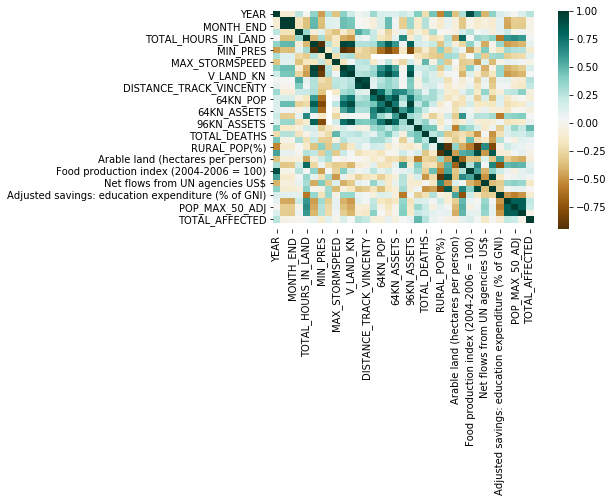

In [123]:
## Numerical Features
## Performing the correlation for all the features
spearman_corr = outliers_5m_df.corr(method='spearman')
sns.heatmap(spearman_corr, cmap="BrBG")

(-1, 10)

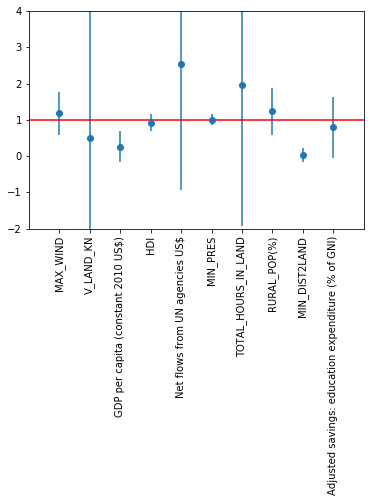

In [169]:
# Comparting outliers and non_outliers datasets

features = set(num_features) - set(['TOTAL_AFFECTED', 'output_class'])

comparison_mean = outliers_5m_df.mean()/non_outliers_5m_df.mean()


# Error propagation (Wikipedia) for division
# https://en.wikipedia.org/wiki/Propagation_of_uncertainty

comparison_error = ((outliers_5m_df.std()/outliers_5m_df.mean())**2 + (non_outliers_5m_df.std()/non_outliers_5m_df.mean())**2)**0.5 
comparison_error = comparison_error*comparison_mean

# Plot with error bars

comparison_mean[features].plot(yerr=comparison_error[features], marker='o', linestyle='none')

plt.xticks(np.arange(len(features)), features,rotation=90)  # Set text labels.

plt.axhline(y=1, color='red')

plt.ylim(-2,4)
plt.xlim(-1,len(features))

In [137]:
outliers_5m_df

,SID,NAME,ISO,YEAR,COORDS,COORDS_MAX_WINDS,COORDS_MIN_DIST2LAND,BASIN,SUB BASIN,MONTH_START,...,"Life expectancy at birth, total (years)",Adjusted savings: education expenditure (% of GNI),Income_level_Final,POP_MAX_34_ADJ,POP_MAX_50_ADJ,POP_MAX_64_ADJ,TOTAL_AFFECTED,TOTAL_AFFECTED_ex_1,output_class,TOTAL_AFFECTED_ex_5
110,1980197N07154,JOE,VNM,1980,"[(20.6511, 108.383), (20.8194, 107.543), (20.9...","[(20.6511, 108.383)]","[(20.9333, 106.787), (20.8699, 106.17), (20.77...",WP,WP,7,...,67.542000,2.300000,Low_Middle,2.133313e+07,1.763439e+07,7.941909e+06,6624710,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
117,1980254N14112,RUTH,VNM,1980,"[(13.5, 112.0), (13.755, 112.23), (14.0, 112.5...","[(19.8725, 106.726), (19.7534, 106.125), (19.5...","[(19.5619, 105.519), (19.3257, 104.917), (19.0...",WP,WP,9,...,67.542000,2.300000,Low_Middle,1.519988e+07,4.054115e+06,1.277103e+06,9027174,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
221,1989254N17145,VERA,CHN,1989,"[(27.3228, 122.963), (27.8743, 122.237), (28.4...","[(28.4, 121.589)]","[(28.4, 121.589), (28.892, 120.999), (29.3908,...",WP,WP,9,...,69.054000,1.600000,Low_Middle,1.054560e+08,3.676831e+07,1.788024e+07,7002696,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
235,1990310N07152,MIKE,PHL,1990,"[(9.27872, 129.89700000000002), (9.45, 129.25)...","[(9.27872, 129.89700000000002), (9.45, 129.25)]","[(10.425, 124.85), (10.515999999999998, 124.04...",WP,WP,11,...,66.366000,2.250849,Low_Middle,1.148013e+07,1.475565e+07,4.096121e+06,6159569,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
300,1994224N20152,FRED,CHN,1994,"[(26.975, 122.075), (27.2621, 121.658), (27.55...","[(26.975, 122.075)]","[(27.8251, 120.567), (28.1, 119.9), (28.3928, ...",WP,WP,8,...,69.670000,1.800000,Low_Middle,1.933975e+08,2.012737e+08,3.607069e+07,11001800,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
336,1996246N08148,SALLY,CHN,1996,"[(20.0965, 116.753), (20.3, 115.7), (20.675, 1...","[(20.0965, 116.753)]","[(21.3266, 110.44), (21.55, 109.4), (21.7468, ...",WP,WP,9,...,70.140000,1.700000,Low_Middle,5.544737e+07,2.992718e+07,8.820692e+06,15005000,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
348,1997232N17115,ZITA,CHN,1997,"[(19.1923, 116.592), (19.4138, 116.19), (20.00...","[(20.9, 110.1), (21.03, 109.451), (21.1, 108.8...","[(20.9, 110.1), (22.0751, 101.779), (22.4, 100...",WP,WP,8,...,70.428000,2.035901,Low_Middle,2.532829e+07,9.820709e+06,1.616265e+06,5650349,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
437,2001303N13276,MICHELLE,CUB,2001,"[(19.8999, -83.5269), (20.1, -83.3), (20.4276,...","[(20.1, -83.3), (20.4276, -82.9227), (20.8, -8...","[(22.1, -81.2), (22.3, -80.9), (22.7291, -80.2...",NAm,CS,11,...,76.905000,7.510000,High_Middle,7.002723e+06,9.335884e+05,3.250637e+05,5900012,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
472,2003196N05150,IMBUDO,CHN,2003,"[(18.5829, 116.117), (19.4, 114.175), (19.6174...","[(18.5829, 116.117), (19.4, 114.175), (19.925,...","[(21.6488, 111.075), (22.125, 110.175), (22.50...",WP,WP,7,...,72.381000,1.790000,Low_Middle,1.250043e+08,6.146549e+07,1.249650e+07,7400020,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
495,2004219N15137,RANANIM,CHN,2004,"[(26.9054, 123.219), (27.35, 122.6), (27.8079,...","[(26.9054, 123.219), (27.35, 122.6)]","[(28.15, 121.35), (28.2748, 120.706), (28.32, ...",WP,WP,8,...,72.689000,1.790000,Low_Middle,8.155931e+07,4.976137e+07,1.079839e+07,9062000,"(30000.0, 29622000.0]",1,"(2100439.0, 29622000.0]"
